In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount(r'/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Feynn Labs/ev/clean_data/small_com_vehicle_clean.csv")
data.head()

,name,price,power,gvw,milage,engine,fuel_tank,payload,fuel_type
0,Tata Yodha Pickup,8.54,98.0,3490.0,NaN,2200.0,45.0,1700.0,Diesel
1,Tata Ace gold,4.21,19.0,1670.0,22.00,700.0,30.0,750.0,NaN
2,Mahindra Jeeto,4.38,16.0,1345.0,32.86,670.0,10.5,600.0,NaN
3,Tata Intra V30,8.11,70.0,2565.0,14.00,1496.0,35.0,1300.0,NaN
4,Force Urbania,28.99,115.0,3625.0,11.00,2596.0,70.0,NaN,NaN


In [ ]:
data.isna().sum()

name          0
price         8
power         3
gvw           3
milage       16
engine        7
fuel_tank     7
payload       6
fuel_type    47
dtype: int64

In [ ]:
# Removing data where price is not present
data['price']=data['price'].fillna(0.0001)
data=data[data['price']!=0.0001]

In [ ]:
data.columns

Index(['name', 'price', 'power', 'gvw', 'milage', 'engine', 'fuel_tank',
       'payload', 'fuel_type'],
      dtype='object')

In [ ]:
data.describe()

,price,power,gvw,milage,engine,fuel_tank,payload
count,47.000000,47.000000,46.000000,37.000000,45.000000,44.000000,44.000000
mean,9.838298,73.808511,2734.543478,25.342973,1880.288889,54.011364,1201.636364
std,5.938465,34.632630,841.976424,50.001411,723.646656,32.085549,488.484895
min,3.910000,16.000000,1345.000000,11.000000,670.000000,2.500000,225.000000
25%,7.255000,58.500000,2207.500000,13.000000,1199.000000,35.000000,983.750000
50%,8.320000,70.000000,2742.500000,17.000000,2179.000000,45.000000,1170.000000
75%,9.080000,80.000000,2990.000000,19.600000,2523.000000,57.750000,1362.500000
max,33.990000,201.000000,6440.000000,320.000000,3455.000000,150.000000,3084.000000


In [ ]:
data.describe(include=['O']).T

,count,unique,top,freq
name,47,38,Maruti Suzuki Super Carry,2
fuel_type,7,3,Diesel,3


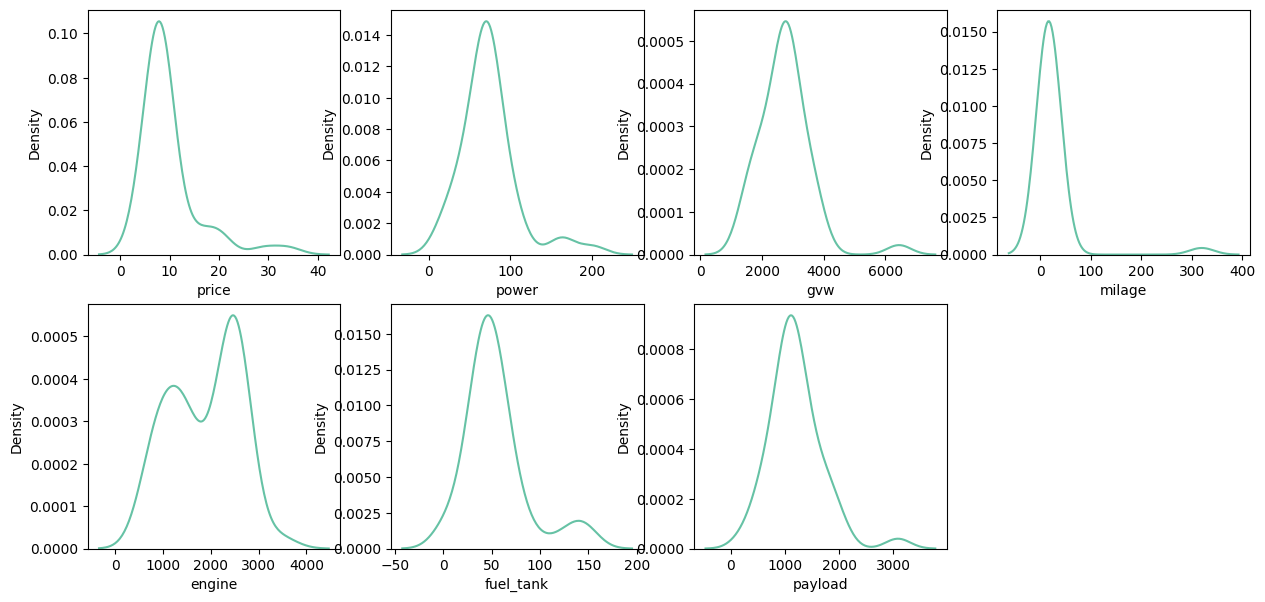

In [ ]:
column=data.describe().columns

i=1
plt.figure(figsize=(15,7))
for col in column:
  plt.subplot(2,4,i)
  sns.kdeplot(data[col])
  i+=1

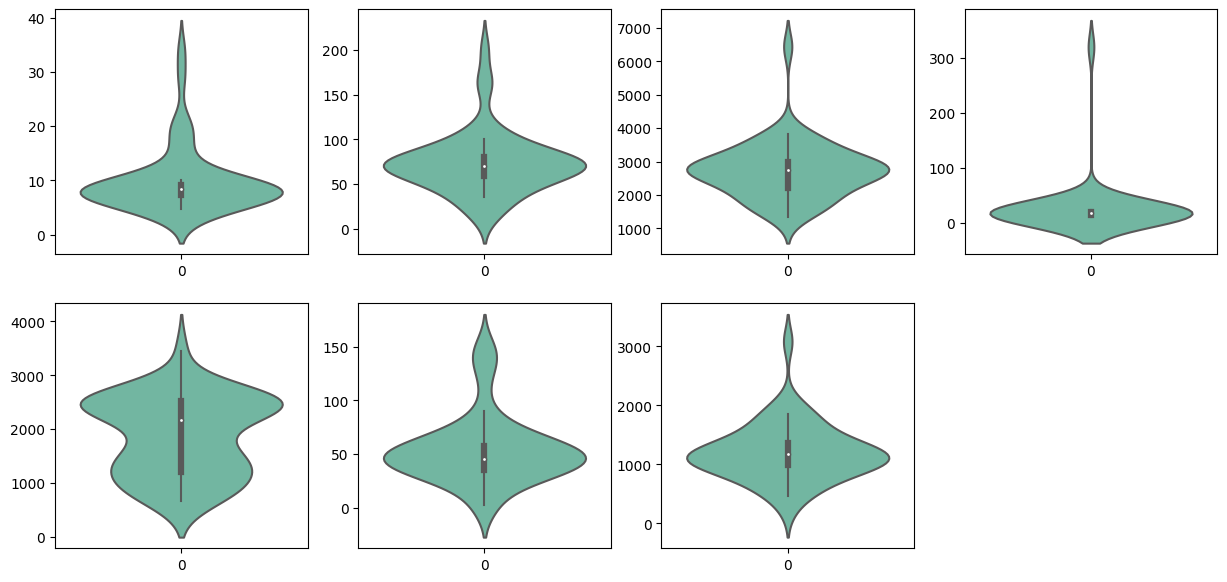

In [ ]:
sns.set_palette('Set2')
i=1
plt.figure(figsize=(15,7))
for col in column:
  fig, ax=plt.subplot(2,4,i)
  sns.violinplot(data[col])
  # ax[]
  i+=1

<ipython-input-22-90473d8600d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

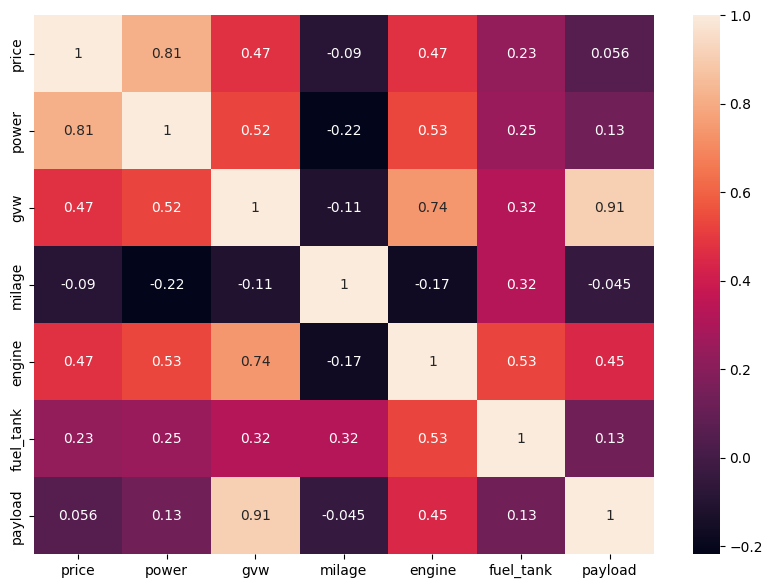

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

* price ---> power
* gvw ---> payload
* engine ---> gvw

In [ ]:
from sklearn.impute import KNNImputer
# import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imptr=IterativeImputer(max_iter=10)
impt_data=imptr.fit_transform(data[['price', 'power', 'gvw', 'engine', 'fuel_tank', 'payload']])
impt_data=pd.DataFrame(impt_data,columns=['price', 'power', 'gvw', 'engine', 'fuel_tank', 'payload'])
impt_data.head()

,price,power,gvw,engine,fuel_tank,payload
0,8.54,98.0,3490.0,2200.0,45.0,1700.000000
1,4.21,19.0,1670.0,700.0,30.0,750.000000
2,4.38,16.0,1345.0,670.0,10.5,600.000000
3,8.11,70.0,2565.0,1496.0,35.0,1300.000000
4,28.99,115.0,3625.0,2596.0,70.0,1012.746695


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# data_driven_df=impt_data

data_driven=StandardScaler().fit_transform(impt_data)

pca=PCA()
pca_df=pca.fit_transform(data_driven)

pca_expl=pd.DataFrame()
pca_expl.index=['standard deviation','proportion of variance','cumulative proportion']

for i in range(len(impt_data.columns)):
      pca_expl[f'PC{i+1}']=None

# standard deviation
pca_expl.loc['standard deviation']=np.sqrt(pca.explained_variance_)
#proportion of variance
pca_expl.loc['proportion of variance']=pca.explained_variance_ratio_
# For cumulative proportion we use list comprehesion
temp=pca.explained_variance_ratio_
coml=[sum(temp[:i]) for i in range(1,len(temp)+1)]
pca_expl.loc['cumulative proportion']=coml
pca_expl

,PC1,PC2,PC3,PC4,PC5,PC6
standard deviation,1.791882,1.221237,0.960252,0.543587,0.451368,0.082868
proportion of variance,0.523754,0.243281,0.150411,0.0482,0.033233,0.00112
cumulative proportion,0.523754,0.767036,0.917447,0.965647,0.99888,1.0


Results from principal components analysis indicate that the first two components capture about 75% of the information contained in the segmentation variables.

In [ ]:
# Explaining components or principle component vector
pca_cmp=pd.DataFrame()
pca_cmp.index=impt_data.columns
for i in range(len(impt_data.columns)):
    pca_cmp[f'PC{i+1}']=pca.components_[i]
pca_cmp

,PC1,PC2,PC3,PC4,PC5,PC6
price,0.388871,0.502942,-0.263181,0.230247,0.621953,0.294491
power,0.410439,0.449619,-0.268688,0.119417,-0.729712,-0.102221
gvw,0.493213,-0.366131,-0.159210,0.100531,0.229324,-0.731194
engine,0.492295,-0.027541,0.216797,-0.820195,0.019004,0.191846
fuel_tank,0.296930,0.072996,0.859696,0.406667,-0.040763,0.019675
payload,0.326401,-0.636202,-0.217065,0.290725,-0.161502,0.575316


In [ ]:
# !pip install bioinfokit

In [ ]:
# !pip install clustergram

In [ ]:
# !pip install urbangrammar-graphics

In [ ]:
# !pip install pacmap

In [ ]:
!pip install bioinfokit clustergram urbangrammar-graphics pacmap

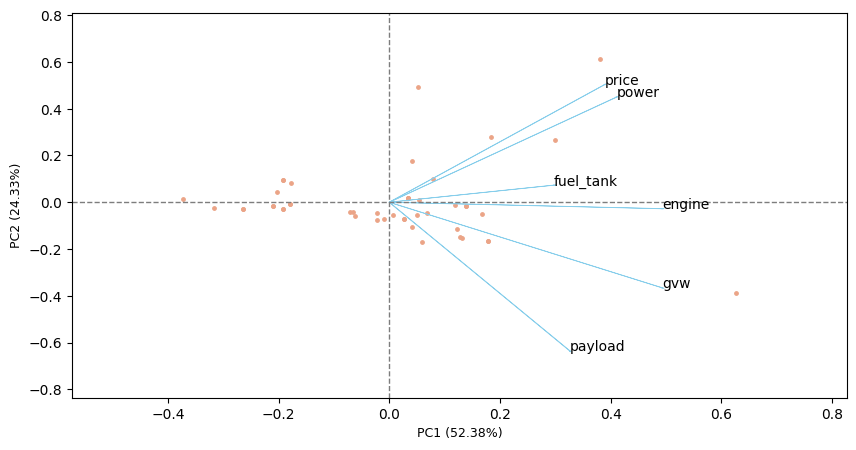

In [ ]:
from bioinfokit.visuz import cluster
# get 2D biplot
cluster.biplot(cscore=pca_df, loadings=pca.components_, labels=impt_data.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

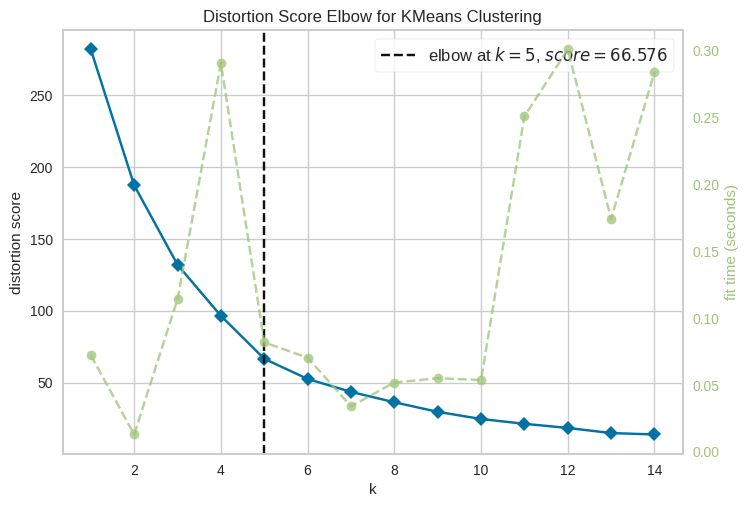

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# data_driven_f=pd.DataFrame(data_driven)
k=0
km = KMeans(n_clusters=k,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
#                 random_state=42,
                algorithm='auto')
visualizer = KElbowVisualizer(km, k=(1,15)).fit(data_driven)
visualizer.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.007 seconds.
K=3 fitted in 0.153 seconds.
K=4 fitted in 0.037 seconds.
K=5 fitted in 0.025 seconds.
K=6 fitted in 0.206 seconds.
K=7 fitted in 0.155 seconds.
K=8 fitted in 0.022 seconds.
K=9 fitted in 0.016 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

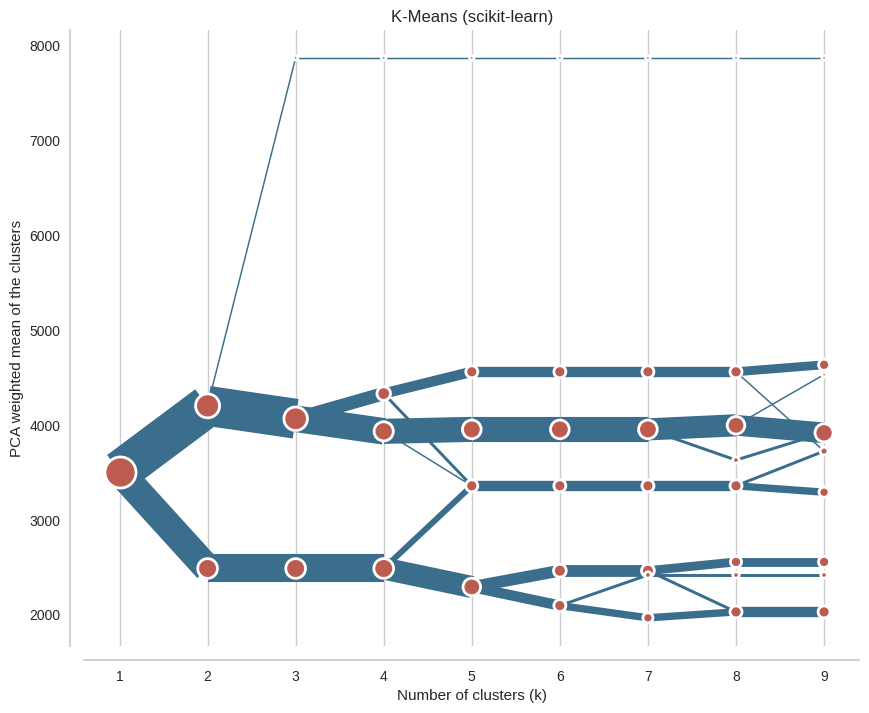

In [ ]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg
cgram = Clustergram(range(1, 10), n_init=10)
cgram.fit(impt_data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

In [ ]:
# Assign lable
km = KMeans(n_clusters=5,
            max_iter=300,
            tol=1e-04,
            init='k-means++',
            n_init=10,
            # random_state=42,
            algorithm='auto')
km.fit(impt_data)
impt_data['cluster']=km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
# Sandardise data
X_std=StandardScaler().fit_transform(impt_data.drop('cluster',axis=1))

X_mean = pd.concat([pd.DataFrame(impt_data.mean().drop('cluster'), columns=['mean']),
                   impt_data.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(impt_data.mean().drop('cluster'), columns=['mean']),
                   impt_data.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

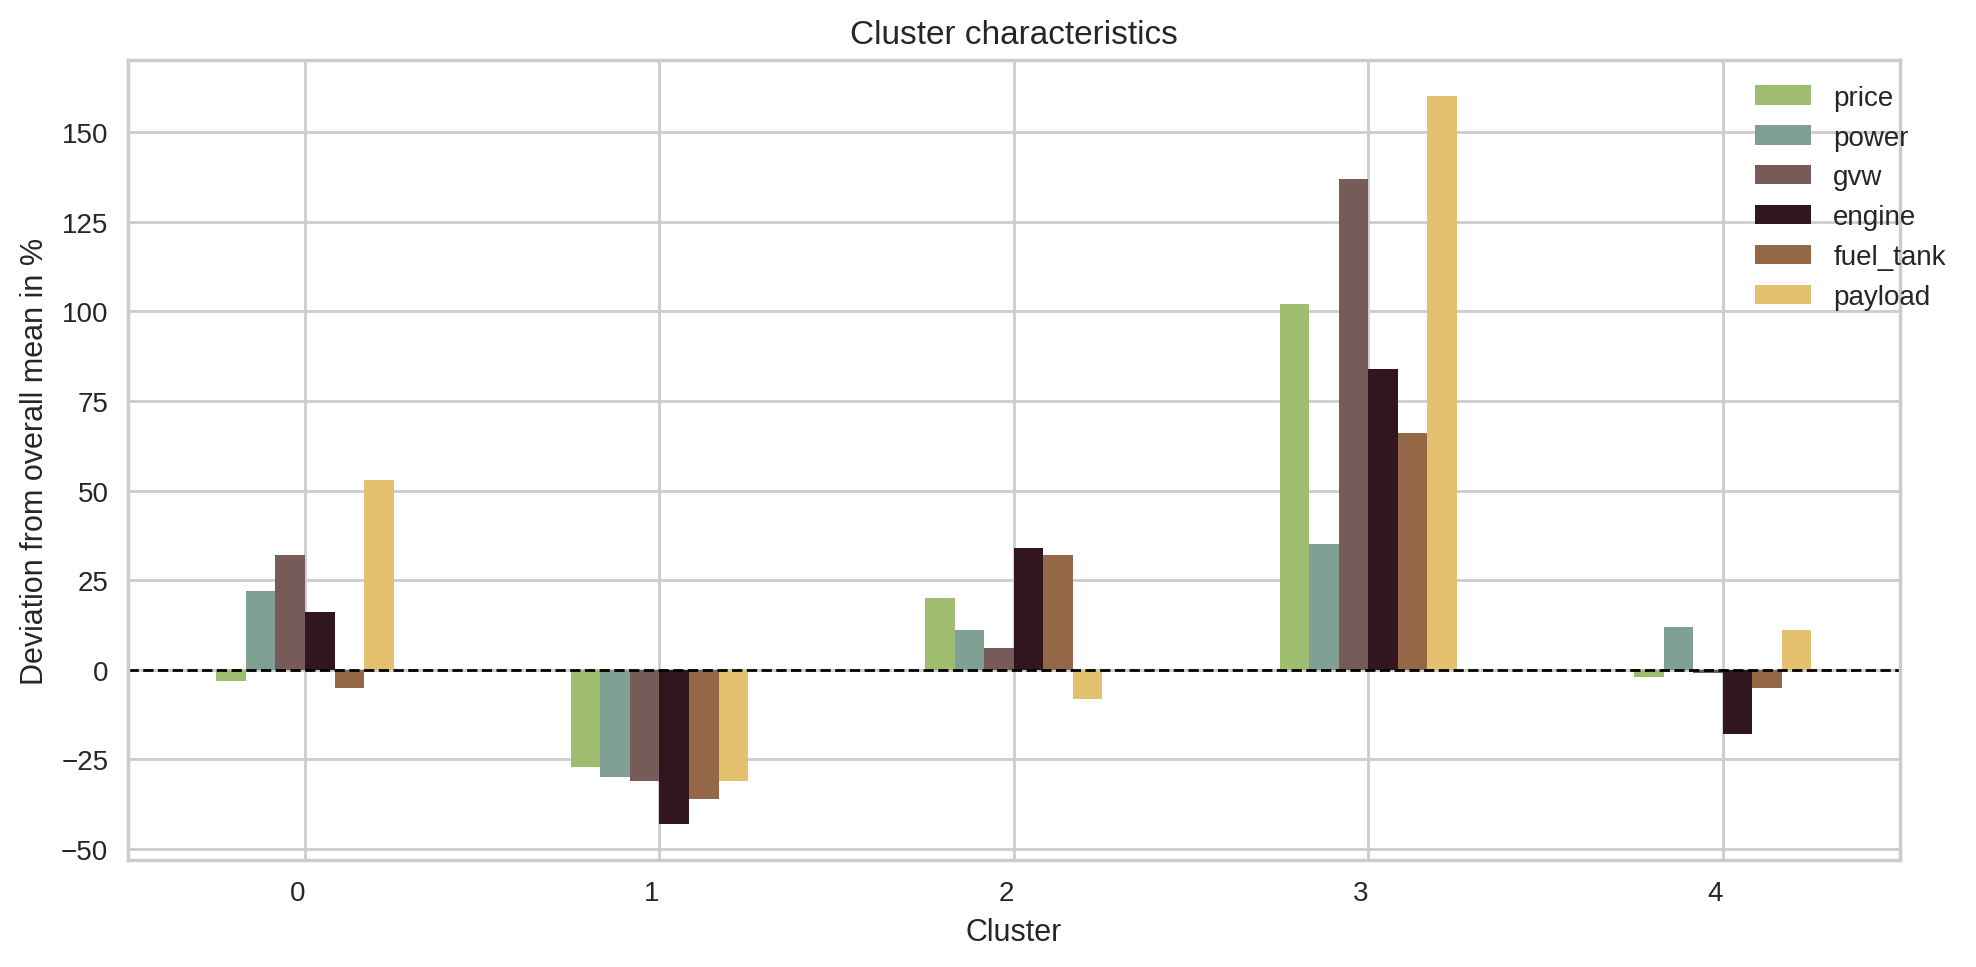

In [ ]:
# Defining some colors
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Concatinating the name and non-imputed payload for better understanding
df_fuel=pd.concat([impt_data,data[['fuel_type', 'payload', 'name']]], axis=1)
df_fuel.columns=['price',	'power',	'gvw',	'engine', 'fuel_tank',	'payload_imp','cluster', 'fuel_type', 'payload', 'name']

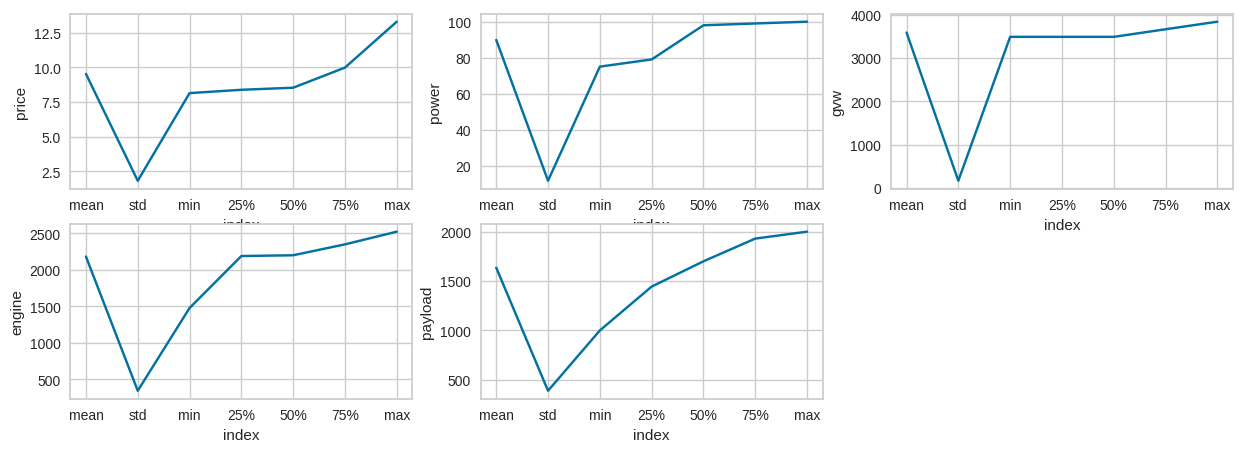

In [ ]:
# Describing Segment 1
describe_num_df = df_fuel[df_fuel['cluster']==0].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

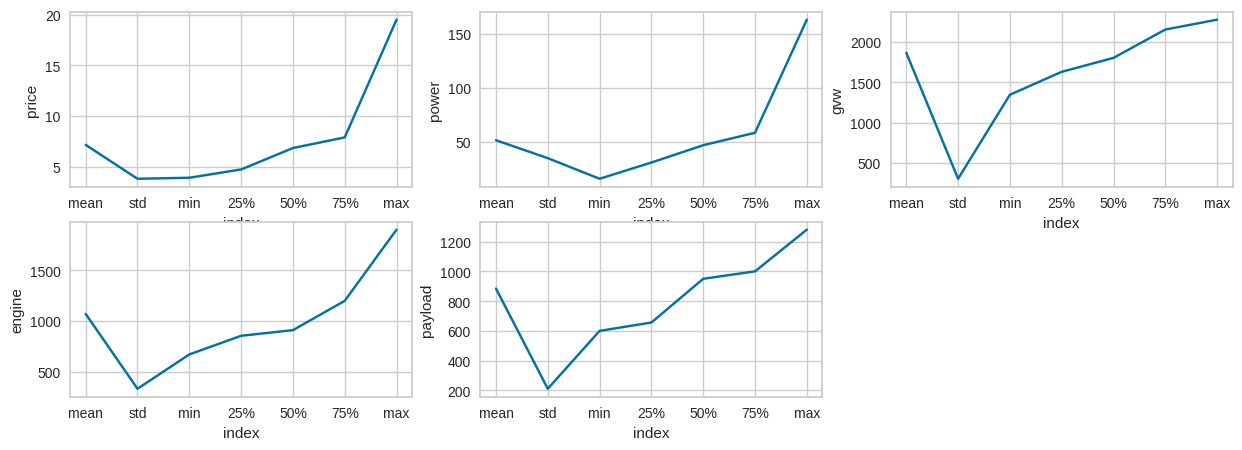

In [ ]:
# Describing Segment 2
describe_num_df = df_fuel[df_fuel['cluster']==1].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

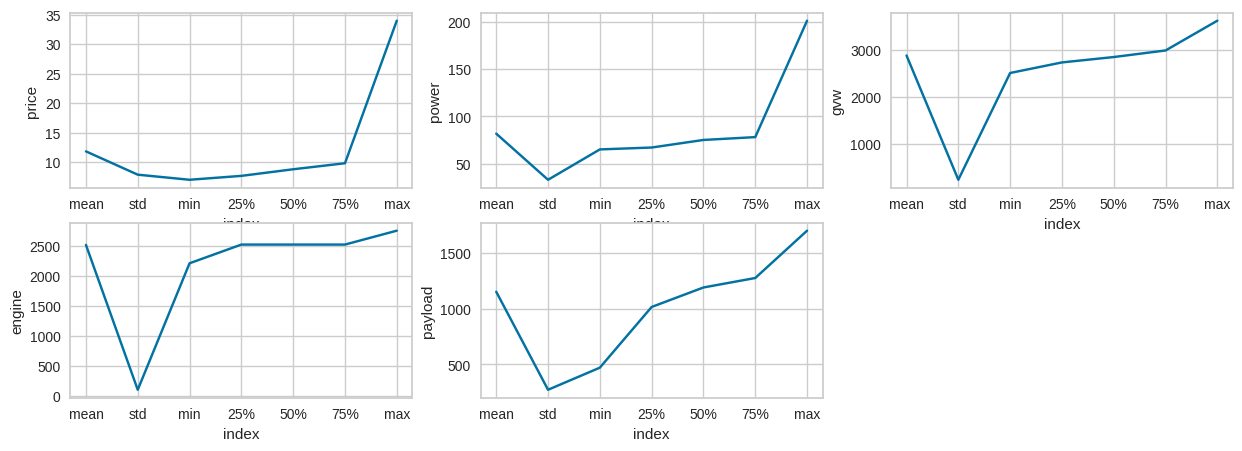

In [ ]:
# Describing Segment 3
describe_num_df = df_fuel[df_fuel['cluster']==2].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

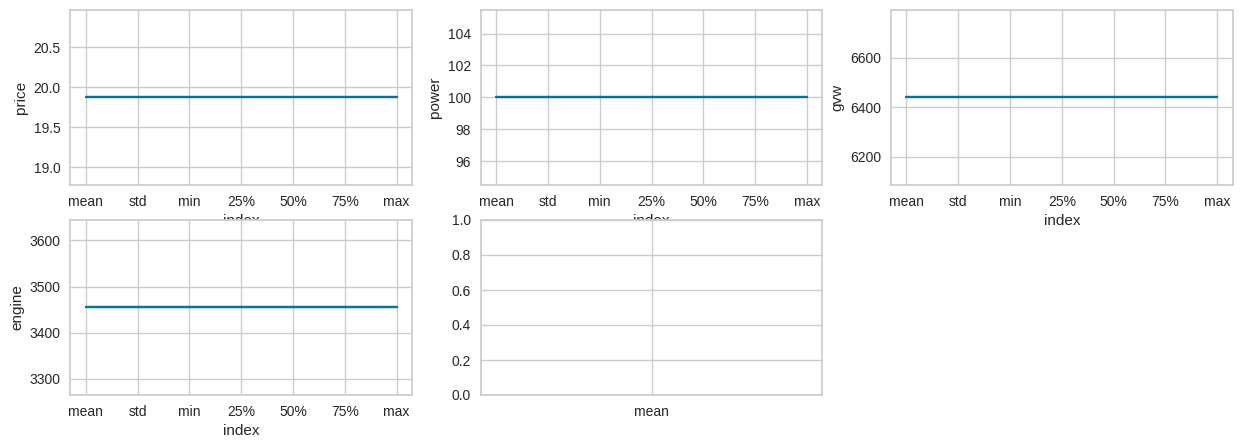

In [ ]:
# Describing Segment 4
describe_num_df = df_fuel[df_fuel['cluster']==3].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  try:
    sns.lineplot(x='index', y=col, data=describe_num_df)
    j+=1
  except:
    continue

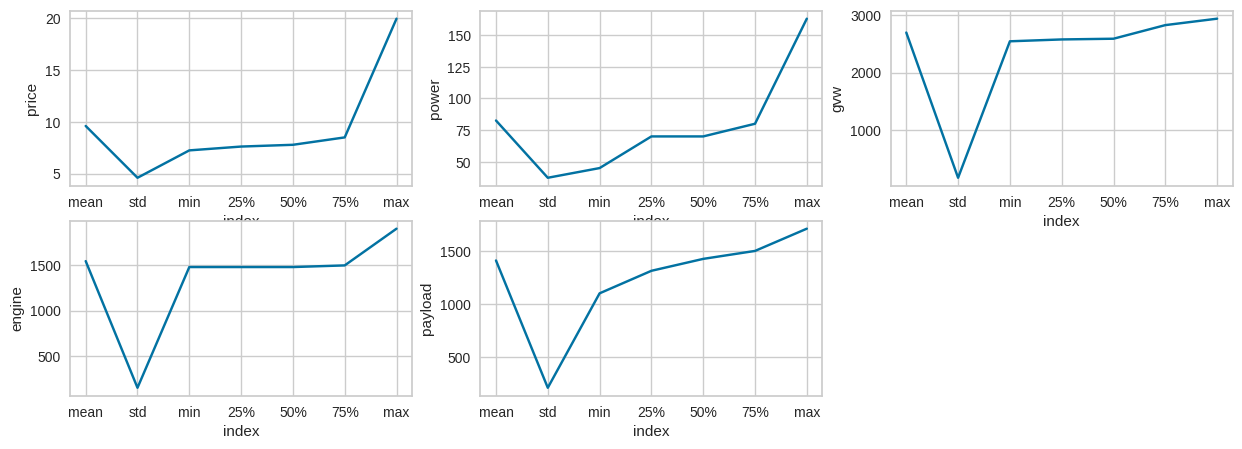

In [ ]:
# Describing Segment 5
describe_num_df = df_fuel[df_fuel['cluster']==4].describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
j=1

plt.figure(figsize=(15,5))
for col in ['price',	'power',	'gvw',	'engine',	'payload']:
  # plt.subplot(1,5,j)
  if col in ['index']:
    continue
  plt.subplot(2,3,j)
  sns.lineplot(x='index', y=col, data=describe_num_df)
  j+=1

segment 2 is ideal

In [ ]:
df_fuel[df_fuel['cluster']==1]

,price,power,gvw,engine,fuel_tank,payload,cluster,fuel_type,payload,name
1,4.21,19.0,1670.000000,700.00000,30.000000,750.0,1.0,NaN,750.0,Tata Ace gold
2,4.38,16.0,1345.000000,670.00000,10.500000,600.0,1.0,NaN,600.0,Mahindra Jeeto
7,9.21,36.0,1840.000000,1547.44969,49.802106,600.0,1.0,Electric,600.0,Tata Ace EV
11,4.73,64.0,1600.000000,1196.00000,70.000000,625.0,1.0,NaN,625.0,Maruti Suzuki Super Carry
12,7.28,44.0,2120.000000,798.00000,30.000000,1000.0,1.0,Diesel,1000.0,Tata Intra V10
13,5.71,26.0,1802.000000,909.00000,30.000000,900.0,1.0,NaN,900.0,Mahindra Supro Profit Truck Mini
15,6.84,47.0,2185.000000,909.00000,33.000000,1050.0,1.0,NaN,1050.0,Mahindra Supro Profit Truck Maxi
16,8.50,53.0,2275.000000,1199.00000,2.500000,1000.0,1.0,CNG+Petrol,1000.0,Tata Intra V20 Bi Fuel
20,4.73,64.0,1600.000000,1196.00000,70.000000,625.0,1.0,NaN,625.0,Maruti Suzuki Super Carry
21,7.28,44.0,2120.000000,798.00000,30.000000,1000.0,1.0,Diesel,1000.0,Tata Intra V10


* All data points are above our above except sale price except except these data points from segment_2 (/cluster_1)Tata Ace gold, Mahindra Jeeto, Mahindra Bolero Pikup ExtraStrong and Maruti Suzuki Super Carry
* From these Tata Ace gold and Mahindra Jeeto seams ideal due to low power because making high power ev is realy challenging, we are targeting a neach without brand vaule for initial is is not good.

In [1]:
# class Radar(object):
#     def __init__(self, figure, title, labels, rect=None):
#         if rect is None:
#             rect = [0.05, 0.05, 0.9, 0.9]

#         self.n = len(title)
#         self.angles = np.arange(0, 360, 360.0/self.n)

#         self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
#         self.ax = self.axes[0]
#         self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
#         self.ax.set_yticklabels([])

#         for ax in self.axes[1:]:
#             ax.xaxis.set_visible(False)
#             ax.set_yticklabels([])
#             ax.set_zorder(-99)

#         for ax, angle, label in zip(self.axes, self.angles, labels):
#             ax.spines['polar'].set_color('black')
#             ax.spines['polar'].set_zorder(-99)

#     def plot(self, values, *args, **kw):
#         angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
#         values = np.r_[values, values[0]]
#         self.ax.plot(angle, values, *args, **kw)
#         kw['label'] = '_noLabel'
#         self.ax.fill(angle, values,*args,**kw)

# fig = plt.figure(figsize=(8, 8))
# no_features = len(km.feature_names_in_)
# radar = Radar(fig, km.feature_names_in_, np.unique(km.labels_))

# for k in range(0,km.n_clusters):
#     cluster_data = X_std_mean[k].values.tolist()
#     radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

# radar.ax.legend()
# radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
# plt.show()

In [4]:
# df_fuel[df_fuel['cluster']==1]

In [3]:
# data.sort_values(by=['price','power','payload','milage'], ascending=[False, False, False, False])

In [2]:
# sns.clustermap(impt_data.drop('cluster',axis=1))
# plt.show()